In [59]:
pip install matplotlib

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [60]:
pip install seaborn

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [61]:
pip install numpy

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [63]:
# 1. drink.csv 파일 로드
# 2. 결측치 확인
# 3. continent 칼럼에 결측치 존재 → 결측치는 'OT'로 변경
# 4. continent별 spirit_servings 칼럼의 평균, 최소, 최대, 합을 bar형으로 출력(하나씩, 합쳐서 출력)
# 5. total_liters_of_pure_alchol 칼럼의 평균보다 높은 continent가 어디인지

In [64]:
# 1. drink.csv 파일 로드

drinks = pd.read_csv('../csv/drinks.csv')

In [65]:
drinks_copy = drinks.copy()

In [66]:
drinks_copy

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [67]:
# 2. 결측치 확인

drinks_copy.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [68]:
# 3. continent 칼럼에 결측치 존재 → 결측치는 'OT'로 변경

drinks_copy['continent'] = drinks_copy['continent'].fillna('OT')

drinks_copy.isna().sum()


country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

In [69]:
# 4. continent별 spirit_servings 칼럼의 평균, 최소, 최대, 합을 출력(하나씩, 합쳐서 출력)

drinks_copy['continent'].unique()       # 칼럼의 종류 확인

array(['AS', 'EU', 'AF', 'OT', 'SA', 'OC'], dtype=object)

In [78]:
'''
con_mean = drinks_copy.groupby('continent')['spirit_servings'].mean()
con_min = drinks_copy.groupby('continent')['spirit_servings'].min()
con_max = drinks_copy.groupby('continent')['spirit_servings'].max()
con_sum = drinks_copy.groupby('continent')['spirit_servings'].sum()
'''

result = drinks_copy.groupby('continent').agg(['mean', 'sum', 'min', 'max'])['spirit_servings']

/var/folders/6r/gdx2hrhn12n6q2bn8xfrvmwc0000gn/T/ipykernel_8159/2248432121.py:8: FutureWarning: ['country'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  result = drinks_copy.groupby('continent').agg(['mean', 'sum', 'min', 'max'])['spirit_servings']


In [79]:
# 4. continent별 spirit_saving 칼럼의 평균, 최소, 최대, 합을 bar형으로 출력(하나씩, 합쳐서 출력)

# plt.bar(x, y)
# x: 그룹화 기준 continent
# y: 평균, 합계, 최소, 최대
# 총 4개의 그래프를 subplot 

'''
plt.bar(drinks_copy['continent'], drinks_copy['con_mean'])
plt.show()
'''

means = result['mean']
sum = result['sum']
min = result['min']
max = result['max']

x = result.index
x

Index(['AF', 'AS', 'EU', 'OC', 'OT', 'SA'], dtype='object', name='continent')

<BarContainer object of 6 artists>

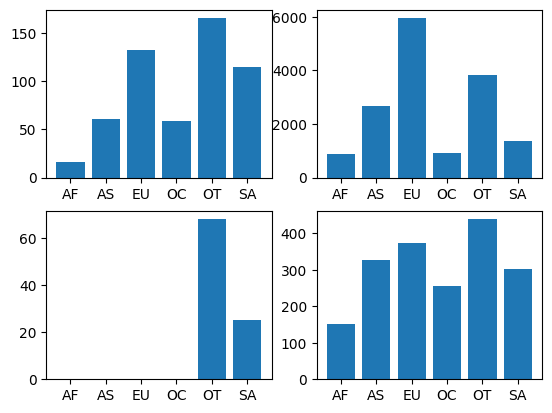

In [80]:
# subplot(행의 수, 열의 수, 위치)
# 4개의 그래프 행의 수 * 열의 수 = 4

plt.subplot(2, 2, 1)
plt.bar(x, means)

plt.subplot(2, 2, 2)
plt.bar(x, sum)

plt.subplot(2, 2, 3)
plt.bar(x, min)

plt.subplot(2, 2, 4)
plt.bar(x, max)

In [73]:
# 전체 데이터의 술 소비량 평균

total_mean = drinks_copy['total_litres_of_pure_alcohol'].mean()

total_mean

4.717098445595855

In [75]:
# 대륙별 술 소비량의 평균

mean_continent = drinks_copy.groupby('continent').mean()['total_litres_of_pure_alcohol']

mean_continent

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [77]:
# 전체, 대륙별 술 소비량의 평균 비교

mean_continent[mean_continent >= total_mean]

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [81]:
cnt = len(x)

cnt

6

In [82]:
index = np.arange(cnt)

index

array([0, 1, 2, 3, 4, 5])

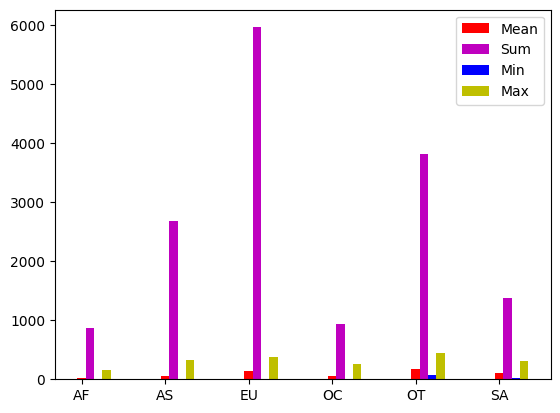

In [89]:
bar_width = 0.1

plt.bar(index, means, bar_width, color = 'r', label = 'Mean')
plt.bar(index + bar_width, sum, bar_width, color = 'm', label = 'Sum')      #index + bar_width: index + 0.1 만큼 옆에 그래프를 만듦
plt.bar(index + bar_width*2, min, bar_width, color = 'b', label = 'Min')
plt.bar(index + bar_width*3, max, bar_width, color = 'y', label = 'Max')

plt.xticks(index, x)
plt.legend()

plt.show()